# Sesión 9

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

Descargamos los datos de https://archive.ics.uci.edu/ml/datasets/Glass+Identification

### Preparación de datos

In [2]:
glass_data = pd.read_csv("./Data2/glass.csv")
glass_data.Type= glass_data.Type.str.replace('\'','')
glass_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00,build wind float
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00,vehic wind float
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00,build wind float
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00,tableware
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24,build wind non-float


In [3]:
glass_data.loc[glass_data.Type == 'build wind float','Type']=1
glass_data.loc[glass_data.Type == 'build wind non-float','Type']=2
glass_data.loc[glass_data.Type == 'vehic wind float','Type']=3
glass_data.loc[glass_data.Type == 'containers','Type']=5
glass_data.loc[glass_data.Type == 'tableware','Type']=6
glass_data.loc[glass_data.Type == 'headlamps','Type']=7
glass_data['Type'] = pd.to_numeric(glass_data['Type'])
glass_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00,1
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00,3
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00,1
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00,6
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24,2


In [4]:
glass_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


array([[<AxesSubplot:title={'center':'K'}>]], dtype=object)

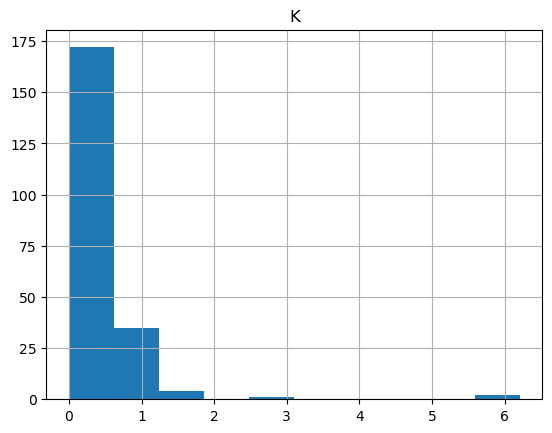

In [5]:
#glass_data.hist("Type", grid="False")
#glass_data.hist("RI", grid="False")
#glass_data.hist("Na", grid="False")
glass_data.hist("K", grid="False")
#glass_data.hist("Ca", grid="False")

214
211


array([[<AxesSubplot:title={'center':'K'}>]], dtype=object)

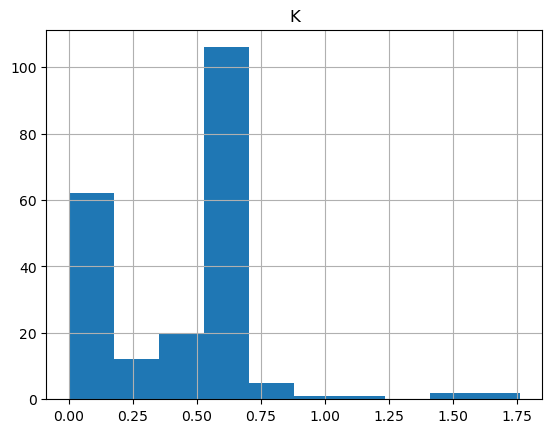

In [6]:
print(len(glass_data))
glass_data = glass_data.drop(glass_data[glass_data['K']>=2].index)
print(len(glass_data))
glass_data.hist("K", grid="False")

array([[<AxesSubplot:title={'center':'Type'}>]], dtype=object)

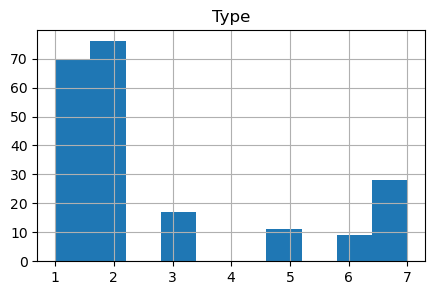

In [7]:
#glass_data.hist("RI", by="Type", grid="False", layout=[1,6],figsize = [10,3])
glass_data.hist("Type", grid="False",figsize = [5,3])

In [8]:
print(len(glass_data))
new_df = glass_data.drop_duplicates()
print(len(new_df))
new_df = new_df.dropna()
print(len(new_df))

211
210
210


In [9]:
glass_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,1.518423,13.418531,2.722701,1.431090,72.658483,0.432464,8.976161,0.177536,0.057820,2.739336
std,0.003013,0.815245,1.416279,0.477912,0.733082,0.305440,1.419638,0.500315,0.097892,2.086993
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516550,12.915000,2.220000,1.190000,72.300000,0.120000,8.255000,0.000000,0.000000,1.000000
50%,1.517690,13.310000,3.480000,1.360000,72.790000,0.550000,8.600000,0.000000,0.000000,2.000000
75%,1.519170,13.850000,3.605000,1.625000,73.085000,0.605000,9.205000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,1.760000,16.190000,3.150000,0.510000,7.000000


### Entrenamiento

In [10]:
y_data = glass_data['Type']
x_data = glass_data.drop('Type', axis = 1)
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)

model = svm.SVC()
model.fit(x_training_data, y_training_data)

predictions = model.predict(x_test_data)
report = classification_report(y_test_data, predictions)
print(report)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        18
           2       0.36      1.00      0.53        23
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00        12

    accuracy                           0.36        64
   macro avg       0.06      0.17      0.09        64
weighted avg       0.13      0.36      0.19        64



C:\Users\Yhony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yhony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yhony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Para más detalle revisar: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report

Para la interpretación revisar: https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/

### Hiperparametro

In [11]:
model1 = svm.SVC()
param_grid = {'C': [0.001, 0.01, 0.05, 0.1],
              'gamma': [0.001, 0.01, 0.05, 0.1],
              'kernel': ['rbf','poly'],
              'probability':[True] }

gs = GridSearchCV(model1, param_grid=param_grid, scoring='accuracy', refit='accuracy', cv=5, return_train_score=True)
gs.fit(x_training_data, y_training_data)
modelo = gs.best_estimator_
predictions = modelo.predict(x_test_data)
report = classification_report(y_test_data, predictions)
print(gs.best_estimator_)
print(report)

SVC(C=0.05, gamma=0.05, kernel='poly', probability=True)
              precision    recall  f1-score   support

           1       0.65      0.72      0.68        18
           2       0.64      0.78      0.71        23
           3       0.00      0.00      0.00         4
           5       1.00      0.17      0.29         6
           6       0.50      1.00      0.67         1
           7       1.00      0.92      0.96        12

    accuracy                           0.69        64
   macro avg       0.63      0.60      0.55        64
weighted avg       0.70      0.69      0.66        64



Para más detalle sobre param_grid revisar: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ParameterGrid.html

https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

Explicación del kernel: https://towardsdatascience.com/radial-basis-function-rbf-kernel-the-go-to-kernel-acf0d22c798a

https://medium.com/@myselfaman12345/c-and-gamma-in-svm-e6cee48626be

Referencias:

- chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/http://www.davidpublisher.com/Public/uploads/Contribute/56f9de9b67f83.pdf